# Data Cleaning & Exploration

**Overview of Implementation**
1. <a href="#section1">Data Cleaning</a>
2. <a href="#section2">Data Imputation</a>
3. <a href="#section3">One Hot Encoding Categorical Features</a>
4. <a href="#section4">Exploratory Data Analysis On Data</a>

In [1]:
# import libraries
library(data.table)
library(ggplot2)

## <a id='section1'>1. Data Cleaning</a>
import data & explore statistics

In [2]:
# Import train data using data.table fread function
wind.dt <- fread("data/train_data.csv") 

cat("Number of NA values: ", sum(is.na(wind.dt)))
summary(wind.dt)
colnames(wind.dt)

Number of NA values:  20579

 tracking_id          datetime         wind_speed(m/s)  
 Length:28200       Length:28200       Min.   :-496.21  
 Class :character   Class :character   1st Qu.:  20.88  
 Mode  :character   Mode  :character   Median :  93.30  
                                       Mean   :  69.04  
                                       3rd Qu.:  95.27  
                                       Max.   : 601.46  
                                       NA's   :273      
 atmospheric_temperature(°C) shaft_temperature(°C) blades_angle(°)    
 Min.   :-99.000             Min.   :-99.00        Min.   :-146.2595  
 1st Qu.:  7.949             1st Qu.: 41.63        1st Qu.:  -1.1977  
 Median : 16.102             Median : 43.69        Median :  -0.4956  
 Mean   :  0.384             Mean   : 40.09        Mean   :  -9.6540  
 3rd Qu.: 23.687             3rd Qu.: 45.67        3rd Qu.:   5.4950  
 Max.   : 80.217             Max.   :169.82        Max.   : 165.9321  
 NA's   :3450                NA's   :2         

[1] "tracking_id"                    "datetime"                      
 [3] "wind_speed(m/s)"                "atmospheric_temperature(°C)"   
 [5] "shaft_temperature(°C)"          "blades_angle(°)"               
 [7] "gearbox_temperature(°C)"        "engine_temperature(°C)"        
 [9] "motor_torque(N-m)"              "generator_temperature(°C)"     
[11] "atmospheric_pressure(Pascal)"   "area_temperature(°C)"          
[13] "windmill_body_temperature(°C)"  "wind_direction(°)"             
[15] "resistance(ohm)"                "rotor_torque(N-m)"             
[17] "turbine_status"                 "cloud_level"                   
[19] "blade_length(m)"                "blade_breadth(m)"              
[21] "windmill_height(m)"             "windmill_generated_power(kW/h)"

In [3]:
# get rid of brackets and units in columns
remove_brackets <- function(x) {  
  gsub("\\(.*?\\)", "", x)
  }
colnames(wind.dt) <- sapply(colnames(wind.dt), remove_brackets)
colnames(wind.dt)

[1] "tracking_id"               "datetime"                 
 [3] "wind_speed"                "atmospheric_temperature"  
 [5] "shaft_temperature"         "blades_angle"             
 [7] "gearbox_temperature"       "engine_temperature"       
 [9] "motor_torque"              "generator_temperature"    
[11] "atmospheric_pressure"      "area_temperature"         
[13] "windmill_body_temperature" "wind_direction"           
[15] "resistance"                "rotor_torque"             
[17] "turbine_status"            "cloud_level"              
[19] "blade_length"              "blade_breadth"            
[21] "windmill_height"           "windmill_generated_power"

In [4]:
# Datetime column is in object format. It should be converted into datetime format

get_year <- function(x) {  
  as.POSIXlt(x,format="%Y-%m-%d %H:%M:%S")$year + 1900 # based on 1990
}
get_month <- function(x){
  as.POSIXlt(x,format="%Y-%m-%d %H:%M:%S")$mon + 1 # 0 index
}
get_mday <- function(x){
  as.POSIXlt(x,format="%Y-%m-%d %H:%M:%S")$mday
}
get_wday <- function(x){
  # The wday component of a POSIXlt object is the numeric weekday (0-6 starting on Sunday).
  as.POSIXlt(x,format="%Y-%m-%d %H:%M:%S")$wday
}
get_hour <- function(x){
  as.POSIXlt(x,format="%Y-%m-%d %H:%M:%S")$hour
}
get_min <- function(x){
  as.POSIXlt(x,format="%Y-%m-%d %H:%M:%S")$min
}
get_sec <- function(x){
  as.POSIXlt(x,format="%Y-%m-%d %H:%M:%S")$sec
}

wind.dt$year <- unlist(lapply(wind.dt$datetime, get_year))
wind.dt$month <- unlist(lapply(wind.dt$datetime, get_month))
wind.dt$mday <- unlist(lapply(wind.dt$datetime, get_mday))
wind.dt$wday <- unlist(lapply(wind.dt$datetime, get_wday))
wind.dt$hour <- unlist(lapply(wind.dt$datetime, get_hour))
wind.dt$min <- unlist(lapply(wind.dt$datetime, get_min))
wind.dt$sec <- unlist(lapply(wind.dt$datetime, get_sec))

wind.dt

tracking_id,datetime,wind_speed,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,⋯,blade_breadth,windmill_height,windmill_generated_power,year,month,mday,wday,hour,min,sec
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
WM_33725,2019-08-04 14:33:20,94.82002,-99.00000,41.723019,-0.90342290,82.41057,42.52302,2563.1245,76.66556,⋯,0.3140648,24.28169,6.766521,2019,8,4,0,14,33,20
WM_698,2018-11-05 10:13:20,241.83273,27.76478,-99.000000,-99.00000000,44.10492,46.25887,2372.3841,78.12980,⋯,0.4484944,27.26214,5.966275,2018,11,5,1,10,13,20
WM_39146,2019-09-14 14:03:20,95.48472,NA,41.855473,12.65276348,42.32210,42.87855,1657.1696,67.65447,⋯,0.3023210,27.36613,2.874342,2019,9,14,6,14,3,20
WM_6757,2018-12-25 15:33:20,238.81942,-99.00000,45.443914,15.11532282,44.75964,47.28210,2888.1341,95.38997,⋯,0.3671399,24.28777,14.851089,2018,12,25,2,15,33,20
WM_21521,2019-05-04 03:13:20,10.72289,NA,41.981183,1.71569610,-17.61646,43.46985,781.6954,37.42307,⋯,0.4533737,27.97165,3.519074,2019,5,4,6,3,13,20
WM_17873,2019-03-22 21:03:20,93.76997,30.32623,17.970619,-99.00000000,43.81643,40.81579,2119.3517,72.34513,⋯,0.3956420,24.67329,4.945780,2019,3,22,5,21,3,20
WM_19873,2019-04-17 18:33:20,16.02625,-99.00000,44.072819,-0.19684483,41.68058,43.38490,778.1100,40.28402,⋯,0.4473414,33.59351,5.089173,2019,4,17,3,18,33,20
WM_30330,2019-07-08 21:03:20,48.73783,12.71681,43.217778,-99.00000000,-48.40509,44.12584,980.9885,43.69187,⋯,0.3548810,29.94482,8.536889,2019,7,8,1,21,3,20
WM_26069,2019-06-07 17:53:20,47.08173,-99.00000,-33.607048,-99.00000000,43.05543,45.25363,957.5802,41.60979,⋯,0.3015496,46.73351,8.739166,2019,6,7,5,17,53,20


## <a id='section2'>2. Data Imputation</a>

Loading required package: colorspace

Loading required package: grid

VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.


Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep




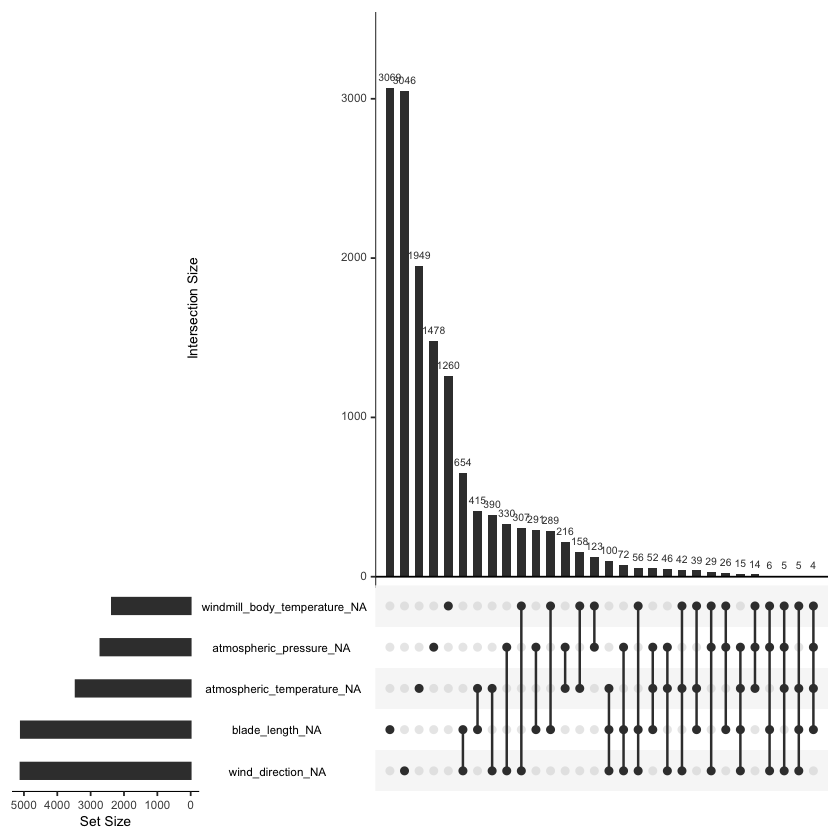

In [5]:
###################
# NA Analysis and Handling
###################
# install.packages("naniar")
library(naniar)
# install.packages("VIM")
library(VIM)

gg_miss_upset(wind.dt) # interesting overview of NA


Warning message in plot.aggr(res, ...):
“not enough vertical space to display frequencies (too many combinations)”



 Variables sorted by number of missings: 
                  Variable        Count
            wind_direction 1.809574e-01
              blade_length 1.806028e-01
   atmospheric_temperature 1.223404e-01
      atmospheric_pressure 9.599291e-02
 windmill_body_temperature 8.379433e-02
              rotor_torque 2.028369e-02
           windmill_height 1.925532e-02
                wind_speed 9.680851e-03
              blades_angle 7.659574e-03
  windmill_generated_power 7.340426e-03
              motor_torque 8.510638e-04
        engine_temperature 4.255319e-04
     generator_temperature 4.255319e-04
         shaft_temperature 7.092199e-05
       gearbox_temperature 3.546099e-05
                resistance 3.546099e-05
               tracking_id 0.000000e+00
                  datetime 0.000000e+00
          area_temperature 0.000000e+00
            turbine_status 0.000000e+00
               cloud_level 0.000000e+00
             blade_breadth 0.000000e+00
                      year 0.000000e+

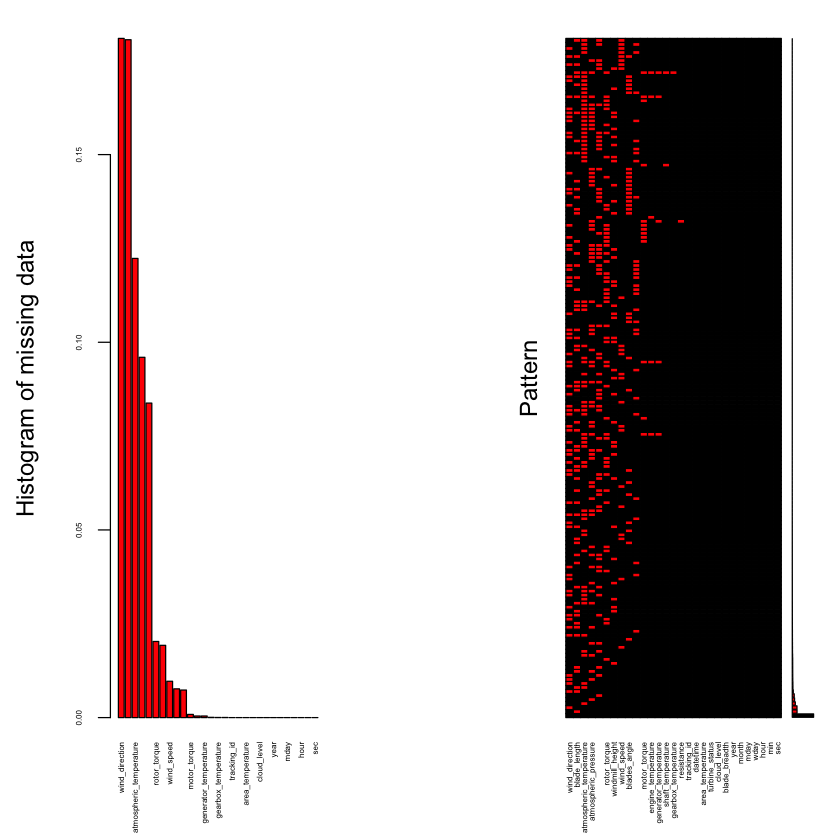

In [6]:
# Missing Values Pattern
aggr_plot <- aggr(wind.dt, col=c('black','red'), 
                  numbers=TRUE, sortVars=TRUE, labels=names(data), 
                  cex.axis=0.4, gap=10, ylab=c("Histogram of missing data","Pattern"))

- **missing columns**: wind_speed  atmospheric_temperature  shaft_temperature  blades_angle  gearbox_temperature  engine_temperature  motor_torque  generator_temperature  atmospheric_pressure  area_temperature  windmill_body_temperature  wind_direction  resistance  rotor_torque  blade_length  windmill_height, turbine_status, cloud_level, windmill_generated_power
- **most number of NA values** come from wind-direction and blade_length
- **most instances of NA values** are unrelated to each other
- **most related pair of NA values** belong to blade_length and wind_direction

In [7]:
# drop column tracking_id and datatime
wind.dt[,datetime:=NULL]

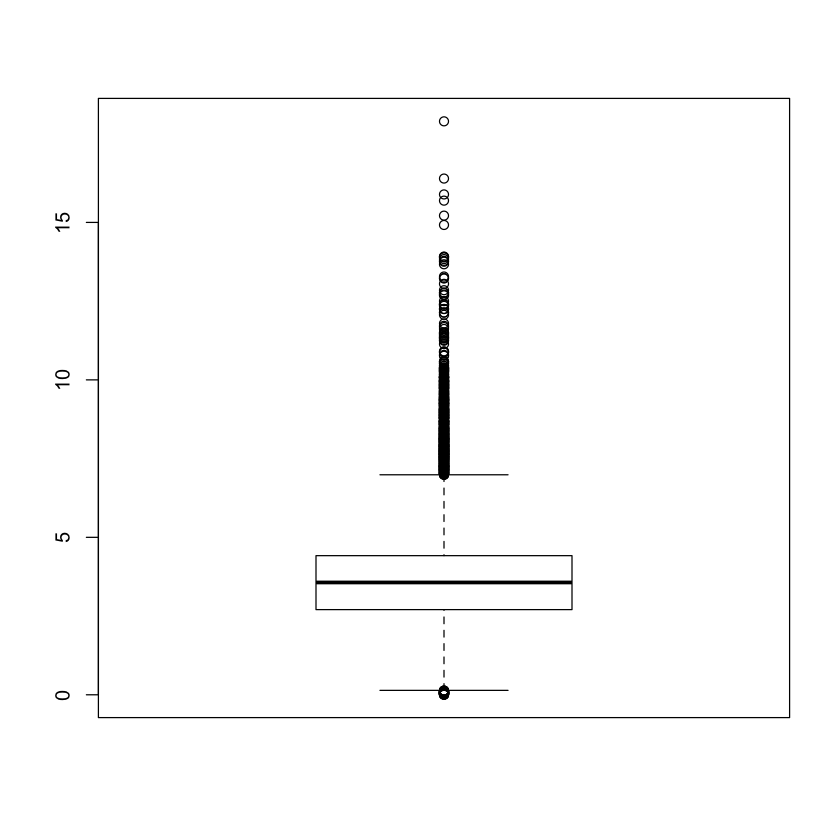

In [37]:
boxplot(wind.dt$blade_length) 
# anomaly is a negative number
# many blade_length values are negative, replace with NA; refine if needed
wind.dt$blade_length <- replace(wind.dt$blade_length, which(wind.dt$blade_length < 0), NA)
boxplot(wind.dt$blade_length) 

individual variable data analysis: interesting findings
1. wind_speed, atmospheric_pressure, resistance: negative values exist, which may represent direction
2. windmill_height, negative values exist, might represent lower than sea level

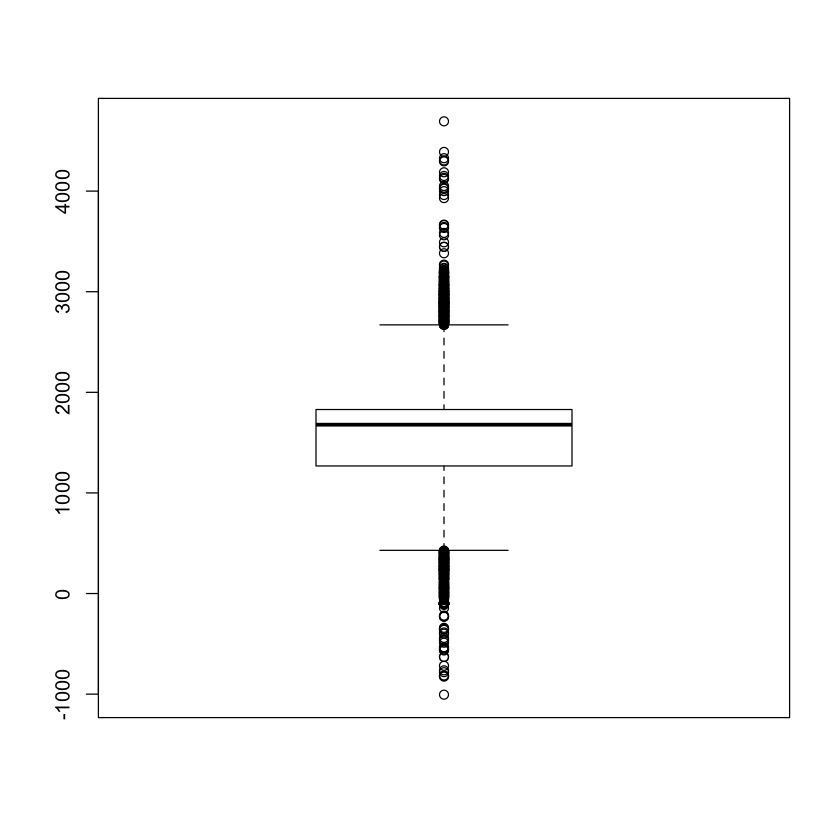

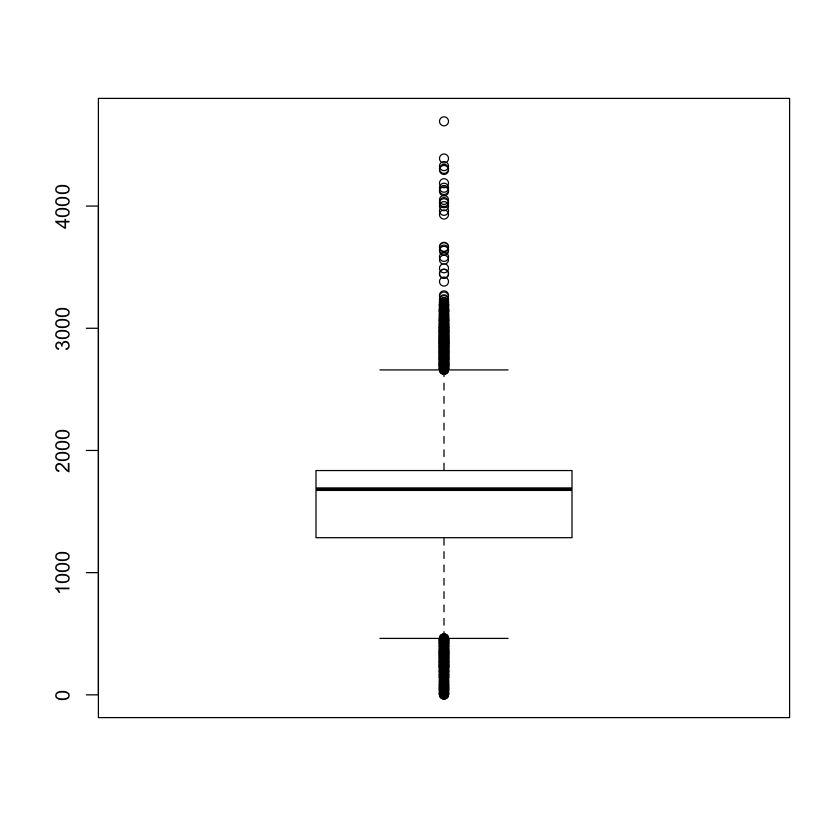

In [38]:
boxplot(wind.dt$resistance) # remove negative resistance
wind.dt$resistance <- replace(wind.dt$resistance, which(wind.dt$resistance < 0), NA)
boxplot(wind.dt$resistance) 

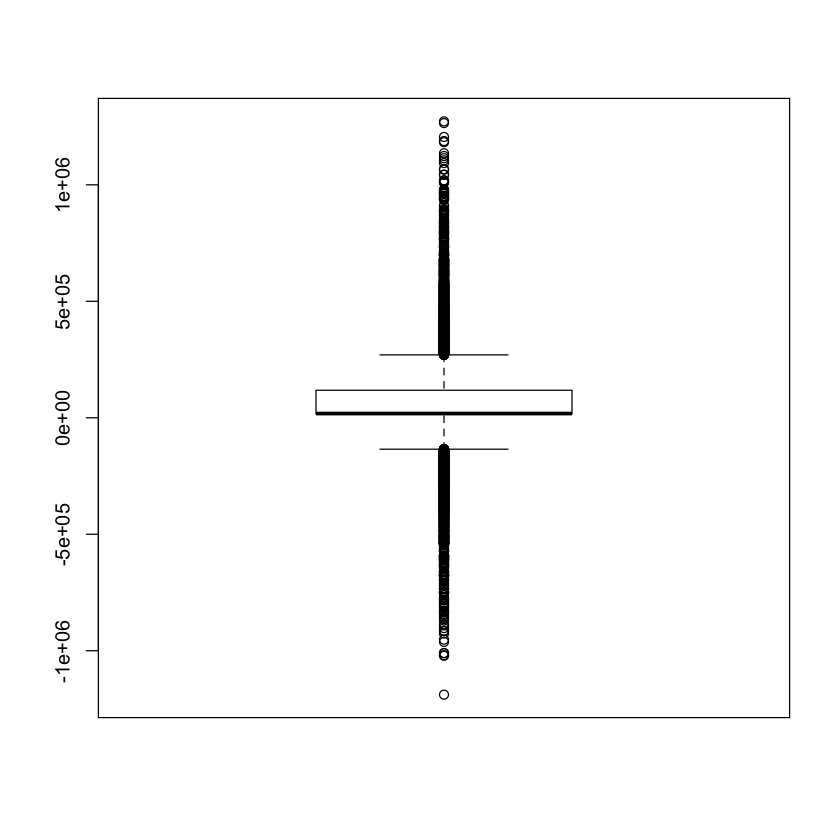

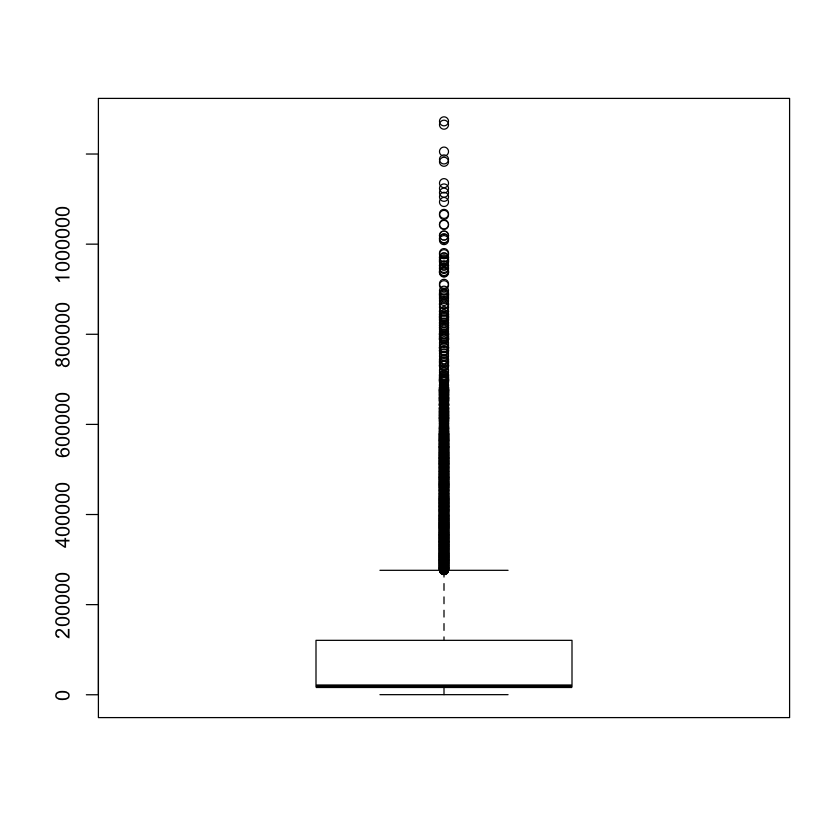

In [39]:
boxplot(wind.dt$atmospheric_pressure) # remove negative values as atmospheric pressure cannot be negative
wind.dt$atmospheric_pressure <- replace(wind.dt$atmospheric_pressure, which(wind.dt$atmospheric_pressure < 0), NA)
boxplot(wind.dt$atmospheric_pressure) 

[1] 3942

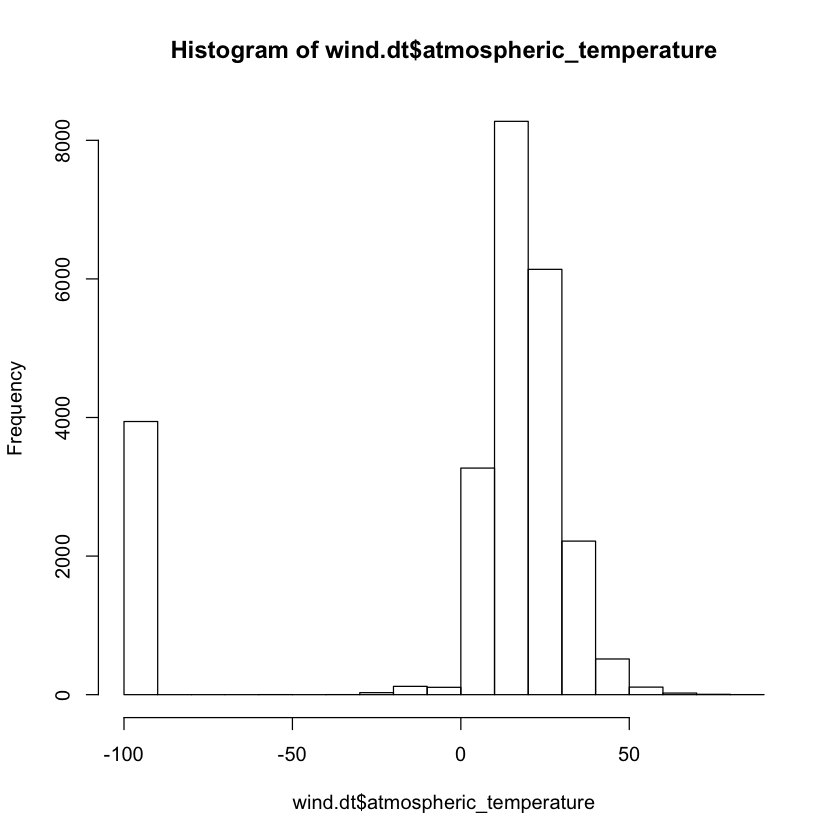

In [47]:
hist(wind.dt$atmospheric_temperature)
nrow(wind.dt[wind.dt$atmospheric_temperature == -99]) # number of rows of data with -99 atmospheric temperature
wind.dt$atmospheric_temperature <- replace(wind.dt$atmospheric_temperature, which(wind.dt$atmospheric_temperature == -99), NA)

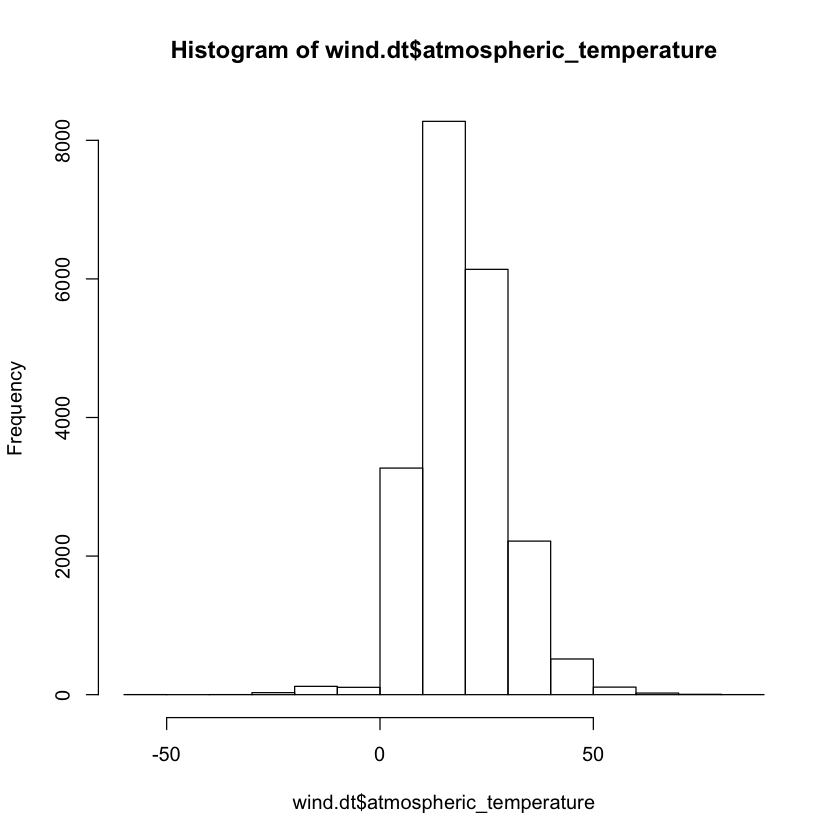

In [48]:
hist(wind.dt$atmospheric_temperature)

Due to the large amount of data having the same constant value of -99, we will make an assumption that -99 refers to missing atmospheric temperature values.

In [49]:
# Data imputation with MICE stochastic regression imputation
library(mice)

wind.dt[wind.dt == ""] <- NA # account for "" as NA

data_imputation = function(data)
{
  # Imputing Numeric missing data using MICE stochastic regression imputation
  imp = mice(wind.dt[,c(2:15,18,20:21)], method = "norm.nob", m = 5, maxit = 5)
  data1 = complete(imp,2)
    
    # Filling missing values in categorical variables using KNN imputer
  imp2 = kNN(wind.dt[,c(16,17)])
  data2 = imp2[,c(1,2)]
  
  # Concatenating all the imputed features
  data1 = cbind(wind.dt[,c(19,22:28)],data1, data2)
  
  return(data1)
}

data1 <- data_imputation(wind.dt)

sum(is.na(wind.dt)) 
sum(is.na(data1)) 


 iter imp variable
  1   1  wind_speed  atmospheric_temperature  shaft_temperature  blades_angle  gearbox_temperature  engine_temperature  motor_torque  generator_temperature  atmospheric_pressure  windmill_body_temperature  wind_direction  resistance  rotor_torque  blade_length  windmill_height  windmill_generated_power
  1   2  wind_speed  atmospheric_temperature  shaft_temperature  blades_angle  gearbox_temperature  engine_temperature  motor_torque  generator_temperature  atmospheric_pressure  windmill_body_temperature  wind_direction  resistance  rotor_torque  blade_length  windmill_height  windmill_generated_power
  1   3  wind_speed  atmospheric_temperature  shaft_temperature  blades_angle  gearbox_temperature  engine_temperature  motor_torque  generator_temperature  atmospheric_pressure  windmill_body_temperature  wind_direction  resistance  rotor_torque  blade_length  windmill_height  windmill_generated_power
  1   4  wind_speed  atmospheric_temperature  shaft_temperature  bla

Warning message in gowerD(don_dist_var, imp_dist_var, weights = weightsx, numericalX, :
“NAs introduced by coercion”
Warning message in gowerD(don_dist_var, imp_dist_var, weights = weightsx, numericalX, :
“NAs introduced by coercion”
Warning message in gowerD(don_dist_var, imp_dist_var, weights = weightsx, numericalX, :
“NAs introduced by coercion”
Warning message in gowerD(don_dist_var, imp_dist_var, weights = weightsx, numericalX, :
“NAs introduced by coercion”


[1] 31895

[1] 0

two datasets will be cleaned, one with and one without data imputation. They will be used for comparisons in model developments in the next stage.

In [50]:
# drop datatime
data1[,sec:=NULL]
wind.dt[,sec:=NULL]

In [51]:
# Converting character variables to factors, after NAs are removed
data1$turbine_status = as.factor(data1$turbine_status)
# data1$turbine_status <- droplevels(wind.dt$turbine_status)
data1$cloud_level = as.factor(data1$cloud_level) # removes unused "" level
# data1$cloud_level <- droplevels(data1$cloud_level) # removes unused "" level
data1$year = as.factor(data1$year)
data1$month = as.factor(data1$month)
data1$mday = as.factor(data1$mday)
data1$wday = as.factor(data1$wday)


levels(data1$cloud_level)
levels(data1$turbine_status)

[1] "Extremely Low" "Low"           "Medium"

[1] "A"   "A2"  "AAA" "AB"  "ABC" "AC"  "B"   "B2"  "BA"  "BB"  "BBB" "BCB"
[13] "BD"  "D"

In [52]:
# Converting character variables to factors, after NAs are removed
wind.dt$turbine_status = as.factor(wind.dt$turbine_status)
# data1$turbine_status <- droplevels(wind.dt$turbine_status)
wind.dt$cloud_level = as.factor(wind.dt$cloud_level) # removes unused "" level
# data1$cloud_level <- droplevels(data1$cloud_level) # removes unused "" level
wind.dt$year = as.factor(wind.dt$year)
wind.dt$month = as.factor(wind.dt$month)
wind.dt$mday = as.factor(wind.dt$mday)
wind.dt$wday = as.factor(wind.dt$wday)


levels(wind.dt$cloud_level)
levels(wind.dt$turbine_status)

[1] "Extremely Low" "Low"           "Medium"

[1] "A"   "A2"  "AAA" "AB"  "ABC" "AC"  "B"   "B2"  "BA"  "BB"  "BBB" "BCB"
[13] "BD"  "D"

In [11]:
# drop the cateogorical variables for the dataset with imputation done
wind.dt_continuous = copy(data1)
wind.dt_continuous[,turbine_status:=NULL]
wind.dt_continuous[,cloud_level:=NULL]
wind.dt_continuous[,year:=NULL]
wind.dt_continuous[,month:=NULL]
wind.dt_continuous[,mday:=NULL]
wind.dt_continuous[,wday:=NULL]
wind.dt_continuous

library(e1071)
# skewness of each continuous variable
skewness <- sapply(wind.dt_continuous, skewness)
summary(skewness)
skewness

blade_breadth,hour,min,wind_speed,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,atmospheric_pressure,area_temperature,windmill_body_temperature,wind_direction,resistance,rotor_torque,blade_length,windmill_height,windmill_generated_power
<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3140648,14,33,94.82002,-99.00000,41.723019,-0.90342290,82.41057,42.52302,2563.1245,76.66556,103402.96,26.89787,24.755465,239.8364,2730.3106,42.08467,2.2175416,24.28169,6.766521
0.4484944,10,13,241.83273,27.76478,-99.000000,-99.00000000,44.10492,46.25887,2372.3841,78.12980,17030.90,39.80147,7.783567,337.9447,1780.2072,107.88864,4.2103463,27.26214,5.966275
0.3023210,14,3,95.48472,-58.83834,41.855473,12.65276348,42.32210,42.87855,1657.1696,67.65447,16125.93,36.11606,45.033197,227.8503,1666.0499,-42.93146,2.7194750,27.36613,2.874342
0.3671399,15,33,238.81942,-99.00000,45.443914,15.11532282,44.75964,47.28210,2888.1341,95.38997,18689.73,46.02005,44.827154,492.0815,1964.5029,42.74460,4.8573852,24.28777,14.851089
0.4533737,3,13,10.72289,-16.03663,41.981183,1.71569610,-17.61646,43.46985,781.6954,37.42307,114468.17,34.57294,-99.000000,259.2746,1177.5162,13.38729,12.3923283,27.97165,3.519074
0.3956420,21,3,93.76997,30.32623,17.970619,-99.00000000,43.81643,40.81579,2119.3517,72.34513,-73006.26,35.31529,101.378184,370.5429,1715.2441,97.74646,2.5040980,24.67329,4.945780
0.4473414,18,33,16.02625,-99.00000,44.072819,-0.19684483,41.68058,43.38490,778.1100,40.28402,121813.38,33.84939,43.008746,528.0040,1222.9313,11.80511,2.9179216,33.59351,5.089173
0.3548810,21,3,48.73783,12.71681,43.217778,-99.00000000,-48.40509,44.12584,980.9885,43.69187,120923.02,30.55316,-99.000000,519.6067,1177.6373,18.38487,2.9388101,29.94482,8.536889
0.3015496,17,53,47.08173,-99.00000,-33.607048,-99.00000000,43.05543,45.25363,957.5802,41.60979,119628.96,26.16807,43.216062,281.3686,-99.0000,19.48676,1.6514377,46.73351,8.739166


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-7.036577 -1.113511 -0.192470 -0.937218  0.004115  0.886786 

blade_breadth                      hour                       min 
             -0.193380745              -0.023521144              -0.005901863 
               wind_speed   atmospheric_temperature         shaft_temperature 
             -0.061237797              -1.443699615              -2.524657208 
             blades_angle       gearbox_temperature        engine_temperature 
             -0.645740750               0.886785754              -3.935943607 
             motor_torque     generator_temperature      atmospheric_pressure 
              0.034163881              -0.191559466               0.050348601 
         area_temperature windmill_body_temperature            wind_direction 
             -0.625357778              -2.051795239               0.151505878 
               resistance              rotor_torque              blade_length 
             -0.697731602              -1.003448685              -7.036576889 
          windmill_height  windmill_generated_power 
             -0.110040429               0.683419363

in general, the data has negative skewness which indicates that the mean of the data values is less than the median, and the data distribution is left-skewed.
- **most negatively skewed in distribution** is blade_length, -9.5087
- **most positively skewed in distribution** is gearbox_temperature, 0.8868

from reference, removal of outliers affects ML model performance; no outlier removal for now 

## <a id='section3'>3. One Hot Encoding Categorical Features</a>

In [19]:
#one-hot encoding
library(caret)
library(readr)
library(dplyr)


one_hot_encoding = function(data1)
{
    tracking_id = data1$tracking_id
    temp_data = select(data1,turbine_status,cloud_level,year, month, mday, wday)
    data = select(data1,-tracking_id,-turbine_status,-cloud_level,-year,-month,-mday,-wday)
    dmy = dummyVars(" ~. ", data = temp_data, fullRank = F)
    temp_encod_data = data.frame(predict(dmy, newdata = temp_data))
    completed_data = cbind(tracking_id,temp_encod_data,data)
  
    return(completed_data)
}

data2 = one_hot_encoding(data1)
colnames(data2)

[1] "turbine_status.A"          "turbine_status.A2"        
 [3] "turbine_status.AAA"        "turbine_status.AB"        
 [5] "turbine_status.ABC"        "turbine_status.AC"        
 [7] "turbine_status.B"          "turbine_status.B2"        
 [9] "turbine_status.BA"         "turbine_status.BB"        
[11] "turbine_status.BBB"        "turbine_status.BCB"       
[13] "turbine_status.BD"         "turbine_status.D"         
[15] "cloud_level.Extremely.Low" "cloud_level.Low"          
[17] "cloud_level.Medium"        "year.2018"                
[19] "year.2019"                 "month.1"                  
[21] "month.2"                   "month.3"                  
[23] "month.4"                   "month.5"                  
[25] "month.6"                   "month.7"                  
[27] "month.8"                   "month.9"                  
[29] "month.10"                  "month.11"                 
[31] "month.12"                  "mday.1"                   
[33] "mday.2"                    "mday.3"                   
[35] "mday.4"                    "mday.5"                   
[37] "mday.6"                    "mday.7"                   
[39] "mday.8"                    "mday.9"                   
[41] "mday.10"                   "mday.11"                  
[43] "mday.12"                   "mday.13"                  
[45] "mday.14"                   "mday.15"                  
[47] "mday.16"                   "mday.17"                  
[49] "mday.18"                   "mday.19"                  
[51] "mday.20"                   "mday.21"                  
[53] "mday.22"                   "mday.23"                  
[55] "mday.24"                   "mday.25"                  
[57] "mday.26"                   "mday.27"                  
[59] "mday.28"                   "mday.29"                  
[61] "mday.30"                   "mday.31"                  
[63] "wday.0"                    "wday.1"                   
[65] "wday.2"                    "wday.3"                   
[67] "wday.4"                    "wday.5"                   
[69] "wday.6"                    "blade_breadth"            
[71] "hour"                      "min"                      
[73] "wind_speed"                "atmospheric_temperature"  
[75] "shaft_temperature"         "blades_angle"             
[77] "gearbox_temperature"       "engine_temperature"       
[79] "motor_torque"              "generator_temperature"    
[81] "atmospheric_pressure"      "area_temperature"         
[83] "windmill_body_temperature" "wind_direction"           
[85] "resistance"                "rotor_torque"             
[87] "blade_length"              "windmill_height"          
[89] "windmill_generated_power"

In [53]:
# save cleaned CSV file (without one-hot encoding, as it will be handled directly by the models)
# one-hot encoding is more for data exploration
fwrite(wind.dt, "data_without_imputation.csv")
fwrite(data1, "data_with_imputation.csv")

Datasets cleaned
- wind.dt: cleaned dataset without imputation
- data1 :cleaned dataset with imputation 
- data2: cleaned dataset with imputation & one-hot encoding
- wind.dt_continuous: cleaned dataset with imputation, contains only continuous variables

## <a id='section4'>4. Data Exploration</a>

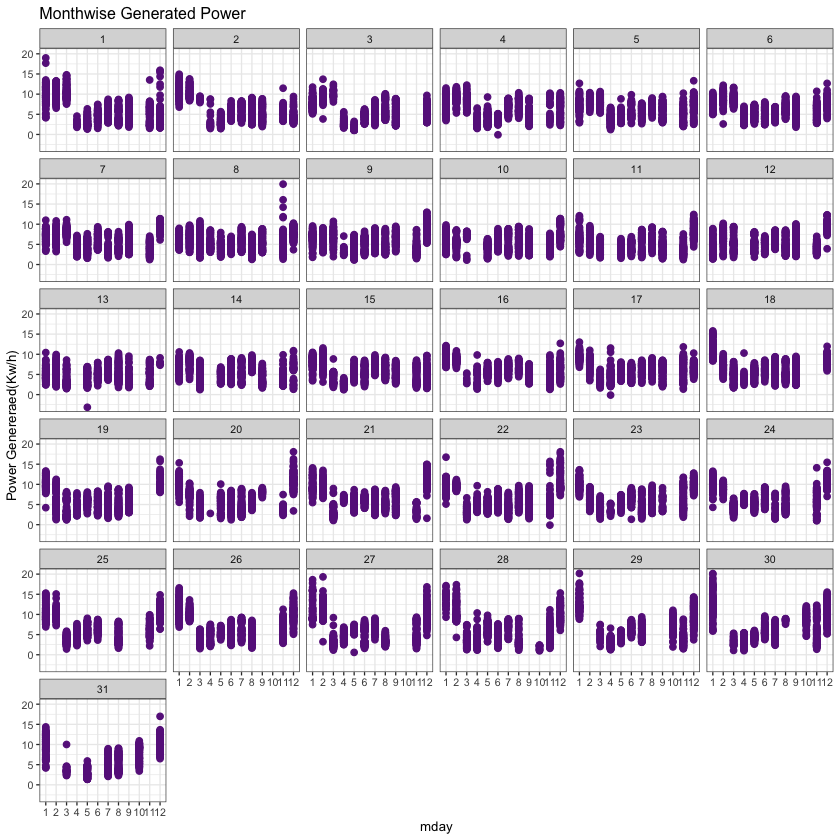

[1] "We observe in the first month(Jan), max power is generated"

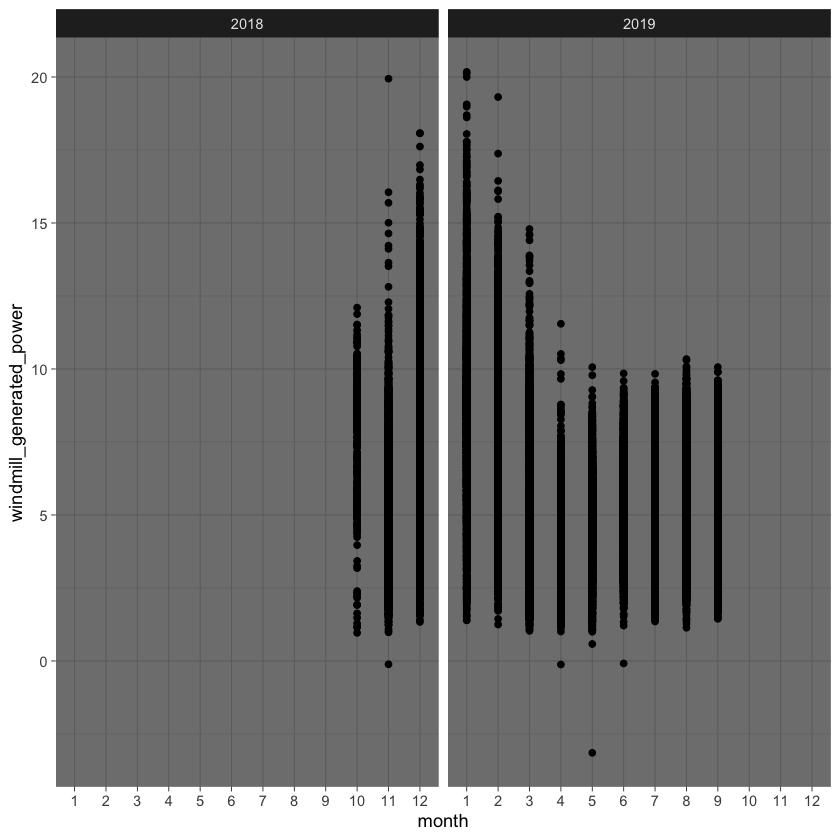

In [125]:
library(visdat)
# install.packages("Hmisc")
library(Hmisc)
library(lattice)
options(warn=-1)

# 1. Time Series analysis w.r.t Target Variable: Power Generated
data2 %>%
  ggplot(aes(x = month, y = windmill_generated_power)) +
  geom_point(color = "darkorchid4") +
  labs(title = "Monthwise Generated Power",
       y = "Power Genereraed(Kw/h)",
       x = "mday") + theme_bw(base_size = 8) + facet_wrap(~mday)

data2 %>%
  ggplot(aes(x = month,y = windmill_generated_power)) + 
  geom_point() + 
  facet_wrap(~year) + 
  theme_dark()
paste("We observe in the first month(Jan), max power is generated")

In [ ]:
wind.dt_continuous[,sec:=NULL]
wind.dt_continuous[,hour:=NULL]
wind.dt_continuous[,min:=NULL]
# remove these variables before visualisation as they are not as significant 

Warning message in melt.data.table(data):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns []. Consider providing at least one of 'id' or 'measure' vars in future.”


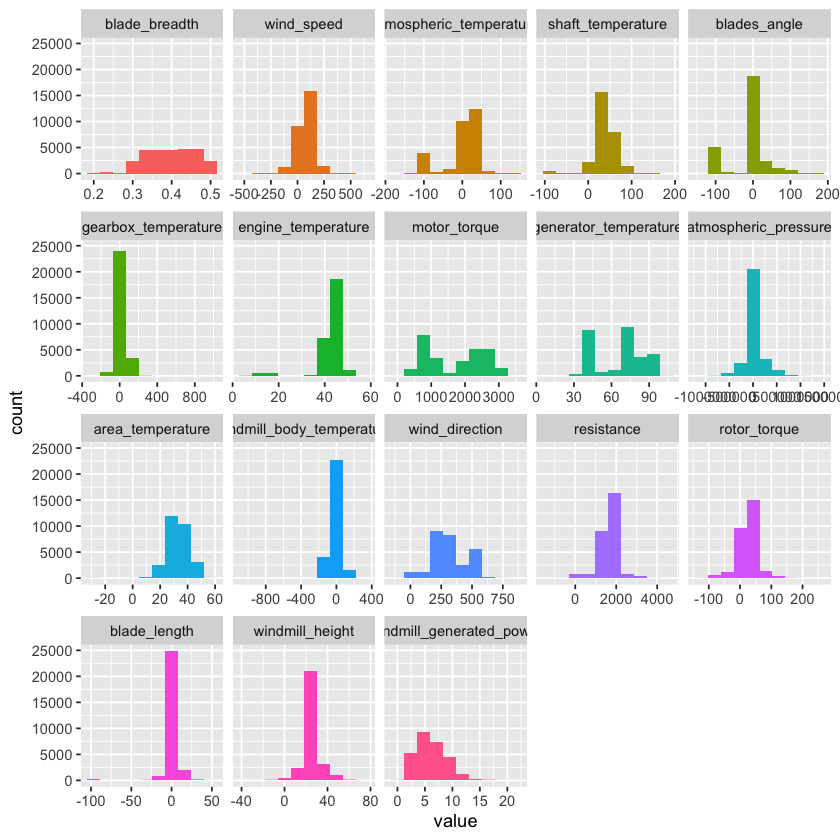

In [22]:
# 2. Analysing all the Numeric Variables
library(funModeling) 
plot_num(wind.dt_continuous)

  year frequency percentage cumulative_perc
1 2019     22867      81.09           81.09
2 2018      5333      18.91          100.00



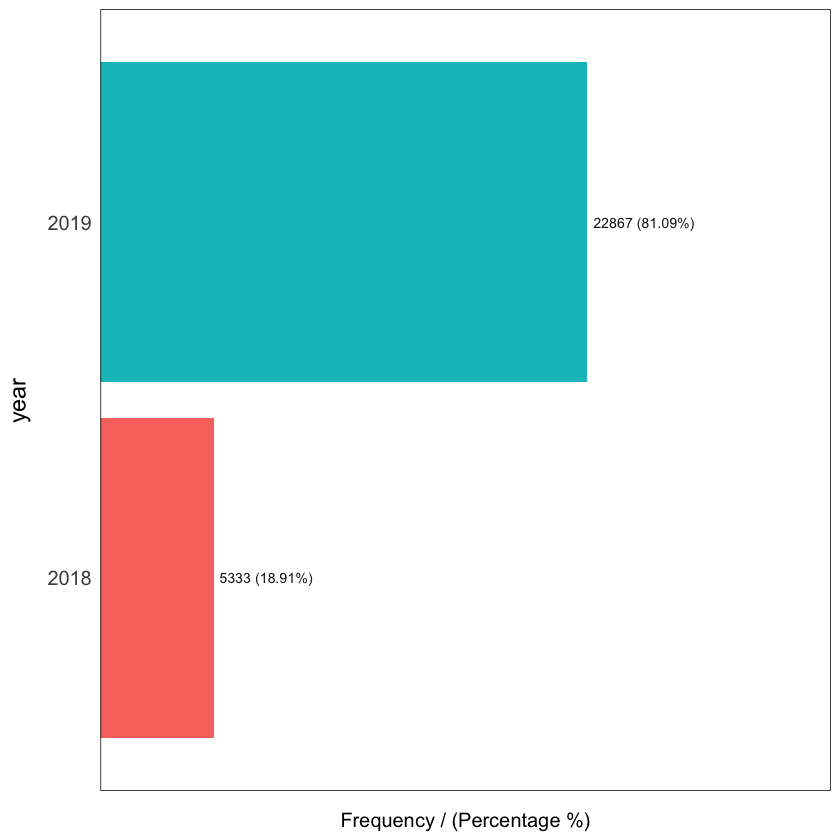

   month frequency percentage cumulative_perc
1      1      2884      10.23           10.23
2      5      2869      10.17           20.40
3      8      2834      10.05           30.45
4      6      2797       9.92           40.37
5      7      2772       9.83           50.20
6     12      2748       9.74           59.94
7      2      2659       9.43           69.37
8     11      2310       8.19           77.56
9      3      2254       7.99           85.55
10     9      2122       7.52           93.07
11     4      1676       5.94           99.01
12    10       275       0.98          100.00



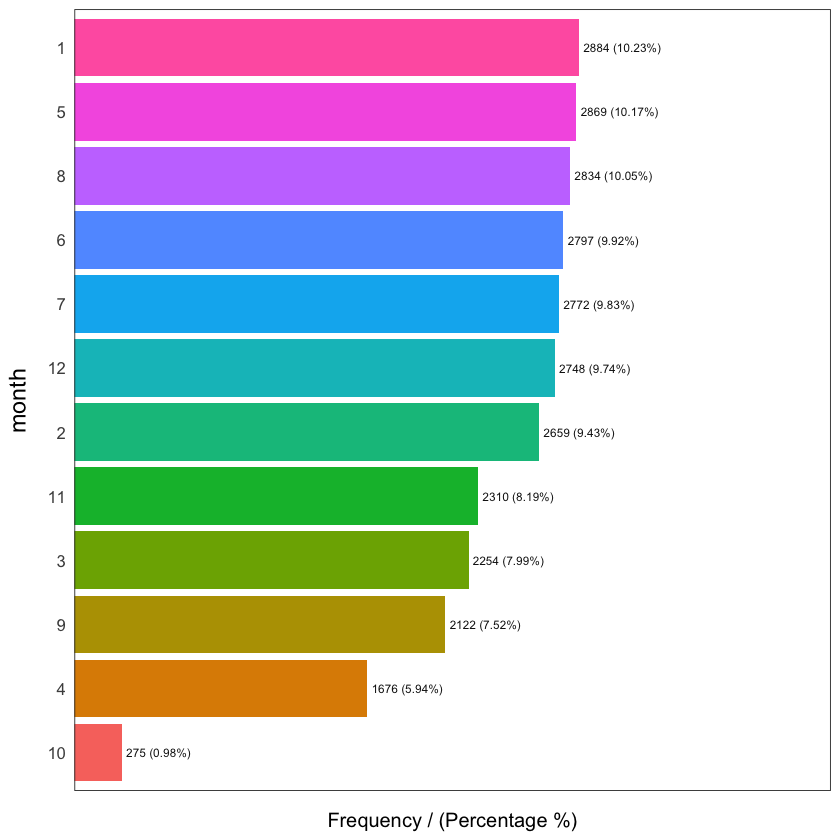

   mday frequency percentage cumulative_perc
1     8      1069       3.79            3.79
2    22      1068       3.79            7.58
3     7      1057       3.75           11.33
4    17      1020       3.62           14.95
5     6      1019       3.61           18.56
6     5      1016       3.60           22.16
7    15      1009       3.58           25.74
8     4       973       3.45           29.19
9     1       967       3.43           32.62
10   19       960       3.40           36.02
11   23       924       3.28           39.30
12    9       917       3.25           42.55
13   10       916       3.25           45.80
14   14       916       3.25           49.05
15   26       916       3.25           52.30
16   11       913       3.24           55.54
17   21       913       3.24           58.78
18   12       908       3.22           62.00
19   18       896       3.18           65.18
20   16       877       3.11           68.29
21   25       866       3.07           71.36
22   13   

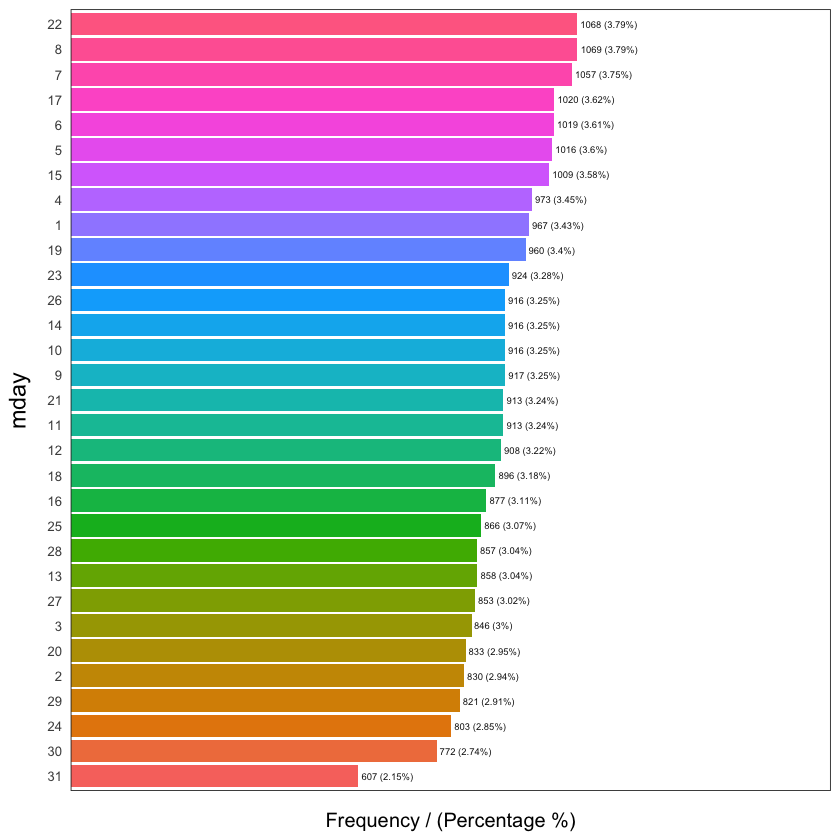

  wday frequency percentage cumulative_perc
1    1      4238      15.03           15.03
2    2      4154      14.73           29.76
3    3      4141      14.68           44.44
4    4      4068      14.43           58.87
5    6      4026      14.28           73.15
6    5      3803      13.49           86.64
7    0      3770      13.37          100.00



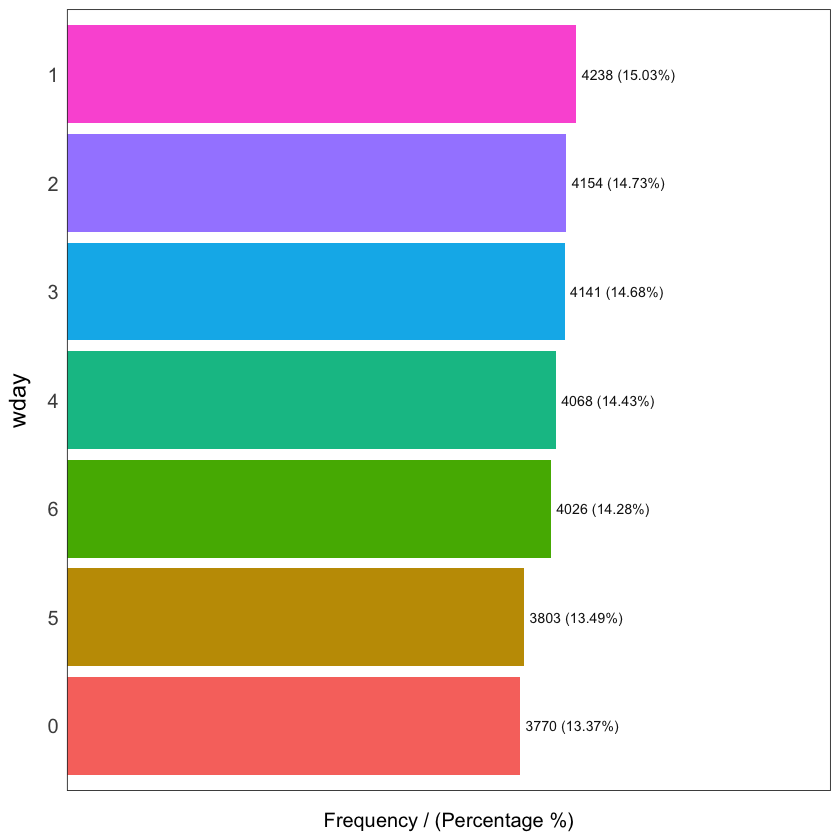

   turbine_status frequency percentage cumulative_perc
1             ABC      3626      12.86           12.86
2              BB      1946       6.90           19.76
3             AAA      1939       6.88           26.64
4             BCB      1933       6.85           33.49
5              B2      1931       6.85           40.34
6               A      1930       6.84           47.18
7               D      1922       6.82           54.00
8               B      1882       6.67           60.67
9              AB      1868       6.62           67.29
10             A2      1855       6.58           73.87
11             BA      1854       6.57           80.44
12             AC      1850       6.56           87.00
13             BD      1843       6.54           93.54
14            BBB      1821       6.46          100.00



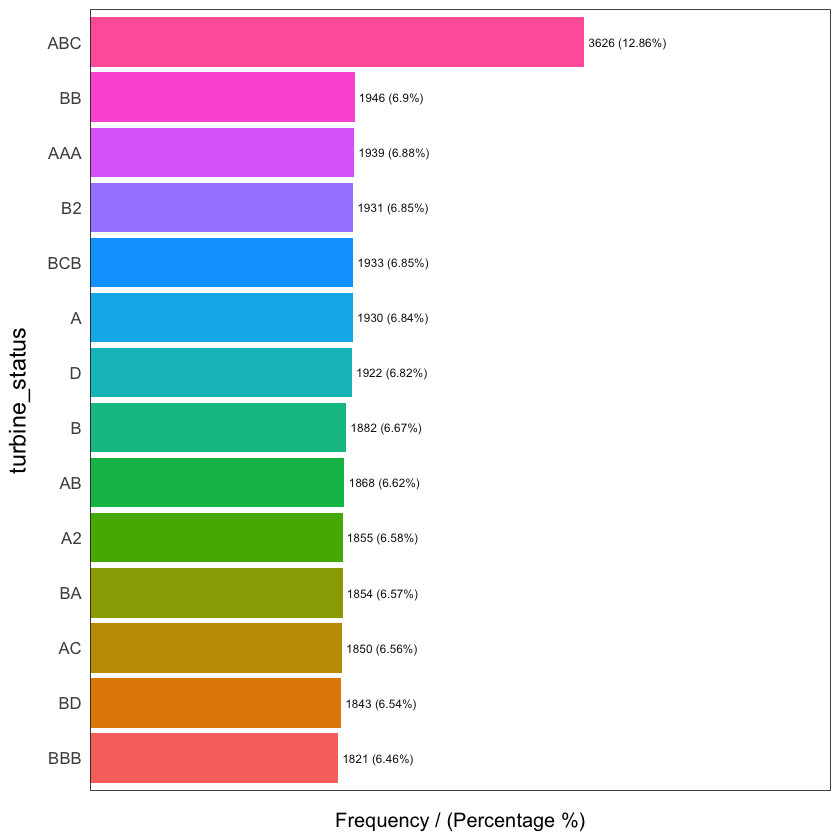

    cloud_level frequency percentage cumulative_perc
1        Medium     13980      49.57           49.57
2           Low     13921      49.37           98.94
3 Extremely Low       299       1.06          100.00



[1] "Variables processed: year, month, mday, wday, turbine_status, cloud_level"

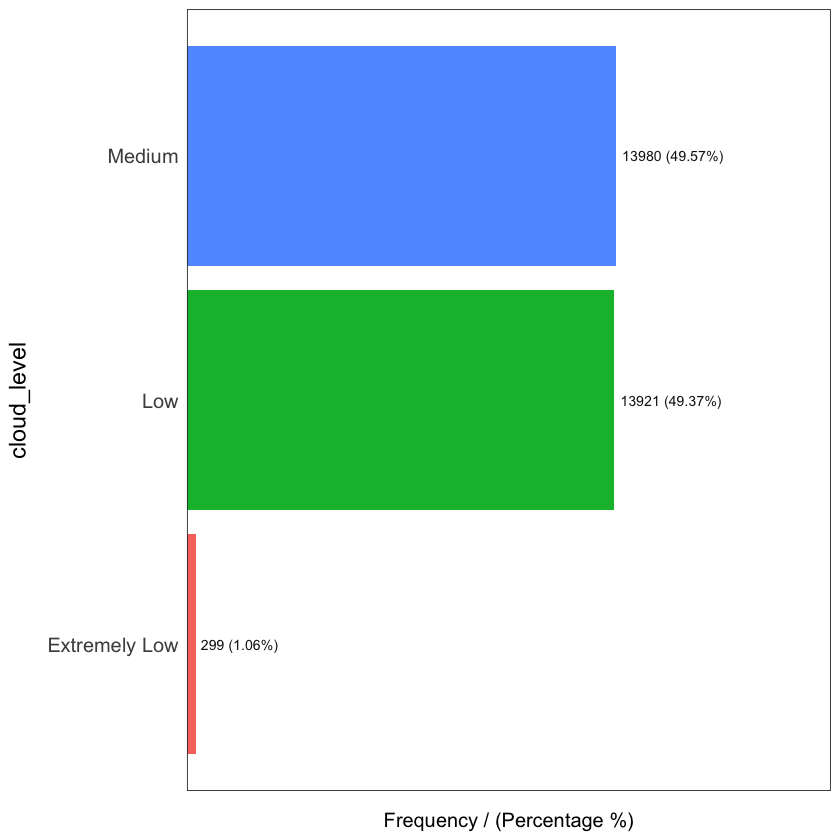

In [25]:
# 3. frequency plot for categorical variables
freq(data1)
# majority is Low for cloud level
# majority = BB for turbine status
# month october is anomaly low in percentage (0.98%)

From these graph we see many outliers, removing these outliers affect the ML model from testing
so the outliers will not be removed

corrplot 0.90 loaded



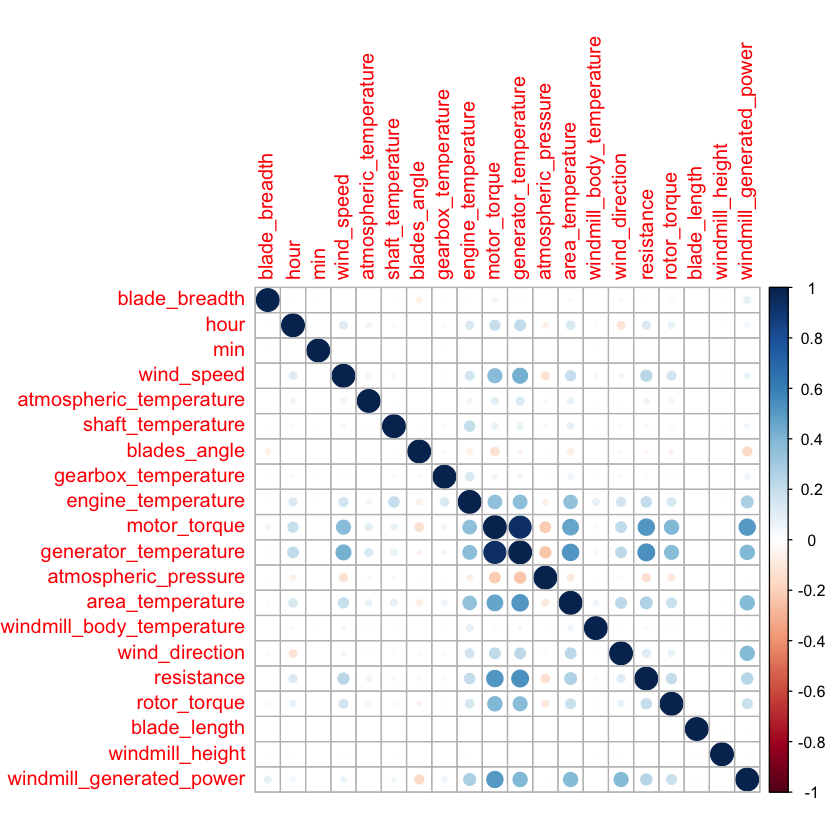

In [16]:
# 4. correlation graph between continuous variables and target variable
# categorical variables have been removed here for a better graph visualization
library(corrplot)
library(RColorBrewer)
corrplot(cor(wind.dt_continuous))

the target variable, windmill_generated_power, is most correlated with motor_torque and a few others such as engine_temperature and area_temperature

In [50]:
# pair-wise correlation coefficients in descending order
# categorical variables have been included
library(tidyverse)
library(igraph, warn.conflicts = FALSE)
data2 %>%
  as_tibble(.name_repair = "universal") %>%
  cor() %>%
  igraph::graph_from_adjacency_matrix(weighted = TRUE,
                                      diag = FALSE) %>%
  igraph::as_data_frame() %>%
  top_n(10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.1     ✔ stringr 1.4.0
✔ tidyr   1.1.0     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks mice::filter(), stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::lift()      masks caret::lift()
✖ purrr::transpose() masks data.table::transpose()

Selecting by weight



from,to,weight
<chr>,<chr>,<dbl>
year.2018,month.11,0.6185272
year.2018,month.12,0.6804030
month.11,year.2018,0.6185272
month.12,year.2018,0.6804030
motor_torque,generator_temperature,0.9348517
generator_temperature,motor_torque,0.9348517
generator_temperature,area_temperature,0.5149537
generator_temperature,resistance,0.5389800
area_temperature,generator_temperature,0.5149537


- The top 4 correlations hold little significance as they are related to the datetime variables. 
- There are some other interseting important correlations to be observed here, such as the strong correlation between motor torque and generator temperature

In [68]:
# correlation coefficients with respect to the target variable, in descending order
library('funModeling')
table <- correlation_table(data=data2, target="windmill_generated_power")
print(table[-1,]) 
# drop the first row which refers to the variable == targer variable 

                    Variable windmill_generated_power
2               motor_torque                     0.51
3      generator_temperature                     0.39
4           area_temperature                     0.38
5             wind_direction                     0.38
6         engine_temperature                     0.27
7                 resistance                     0.24
8               rotor_torque                     0.19
9              blade_breadth                     0.09
10                wind_speed                     0.06
11                      hour                     0.05
12         shaft_temperature                     0.05
13       gearbox_temperature                     0.05
14              blade_length                     0.02
15                       min                     0.00
16   atmospheric_temperature                     0.00
17 windmill_body_temperature                     0.00
18           windmill_height                     0.00
19      atmospheric_pressure